# Explanatory Data Analysis

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")
# set max_colwidth of cell pandas dataframe to show full dataframe
pd.set_option('display.max_colwidth', -1)

In [2]:
loan_df = pd.read_csv("./data/clean_loan.csv")
loan_df.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating_Alpha,ProsperRating_Numeric,ProsperScore,...,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors,IsBorrowerHomeowner
0,2012-04-10 09:14:46.297,36,Defaulted,2012-12-19,0.35797,0.3177,0.3077,HR,1.0,5.0,...,0.0,"$50,000-74,999",5500.000000,140,4000,2012-04-19,173.71,-9.81,10,True
1,2013-04-22 13:29:19.073,36,Defaulted,2013-12-26,0.28032,0.2419,0.2319,D,3.0,5.0,...,0.0,"$25,000-49,999",2500.000000,193,2000,2013-04-26,78.67,-4.89,30,False
2,2013-02-12 18:07:31.690,60,Completed,2013-10-22,0.30748,0.2809,0.2709,E,2.0,3.0,...,0.0,"$25,000-49,999",3885.916667,0,4000,2013-02-21,124.76,-25.81,37,False
3,2010-06-16 16:23:44.533,36,Completed,2013-07-03,0.11296,0.0920,0.0820,A,6.0,9.0,...,0.0,"$75,000-99,999",6666.666667,0,4000,2010-06-24,0.00,-64.62,121,True
4,2012-01-30 17:59:17.200,36,Completed,2012-12-19,0.12782,0.0999,0.0899,A,6.0,9.0,...,42488.0,"$25,000-49,999",3750.000000,0,10000,2012-02-07,322.62,-68.22,30,False


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25992 entries, 0 to 25991
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingCreationDate        25992 non-null  object 
 1   Term                       25992 non-null  int64  
 2   LoanStatus                 25992 non-null  object 
 3   ClosedDate                 25992 non-null  object 
 4   BorrowerAPR                25992 non-null  float64
 5   BorrowerRate               25992 non-null  float64
 6   LenderYield                25992 non-null  float64
 7   ProsperRating_Alpha        25992 non-null  object 
 8   ProsperRating_Numeric      25992 non-null  float64
 9   ProsperScore               25992 non-null  float64
 10  ListingCategory_Numeric    25992 non-null  int64  
 11  BorrowerState              25992 non-null  object 
 12  Occupation                 25992 non-null  object 
 13  EmploymentStatus           25992 non-null  obj

In [4]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Term,25992.0,37.999077,10.575528,12.00000,36.000000,36.000000,36.000000,60.000000
BorrowerAPR,25992.0,0.251491,0.090386,0.04583,0.173590,0.268340,0.335530,0.423950
BorrowerRate,25992.0,0.219606,0.084177,0.04000,0.146900,0.231000,0.295800,0.360000
LenderYield,25992.0,0.209591,0.084181,0.03000,0.136900,0.221000,0.285800,0.340000
ProsperRating_Numeric,25992.0,3.663396,1.814511,1.00000,2.000000,3.000000,5.000000,7.000000
ProsperScore,25992.0,6.267313,2.319193,1.00000,5.000000,6.000000,8.000000,11.000000
ListingCategory_Numeric,25992.0,3.754694,4.109566,0.00000,1.000000,2.000000,7.000000,20.000000
AmountDelinquent,25992.0,995.854494,7179.725855,0.00000,0.000000,0.000000,0.000000,327677.000000
StatedMonthlyIncome,25992.0,5491.003507,6825.602083,0.00000,3166.666667,4583.333333,6666.666667,618547.833333
LoanCurrentDaysDelinquent,25992.0,116.259926,253.927546,0.00000,0.000000,0.000000,0.000000,1593.000000


In [5]:
loan_df.describe(include=object).T

,count,unique,top,freq
ListingCreationDate,25992,25979,2013-09-09 13:15:21.327,2
LoanStatus,25992,3,Completed,19651
ClosedDate,25992,1452,2014-03-04,104
ProsperRating_Alpha,25992,7,D,5867
BorrowerState,25992,48,CA,3305
Occupation,25992,67,Other,6756
EmploymentStatus,25992,7,Employed,16479
IncomeRange,25617,6,"$25,000-49,999",8319
LoanOriginationDate,25992,1143,2011-08-31,133


In [6]:
base_color = sns.color_palette()[0]
plt.rcParams["figure.figsize"] = (12, 8)

<AxesSubplot:>

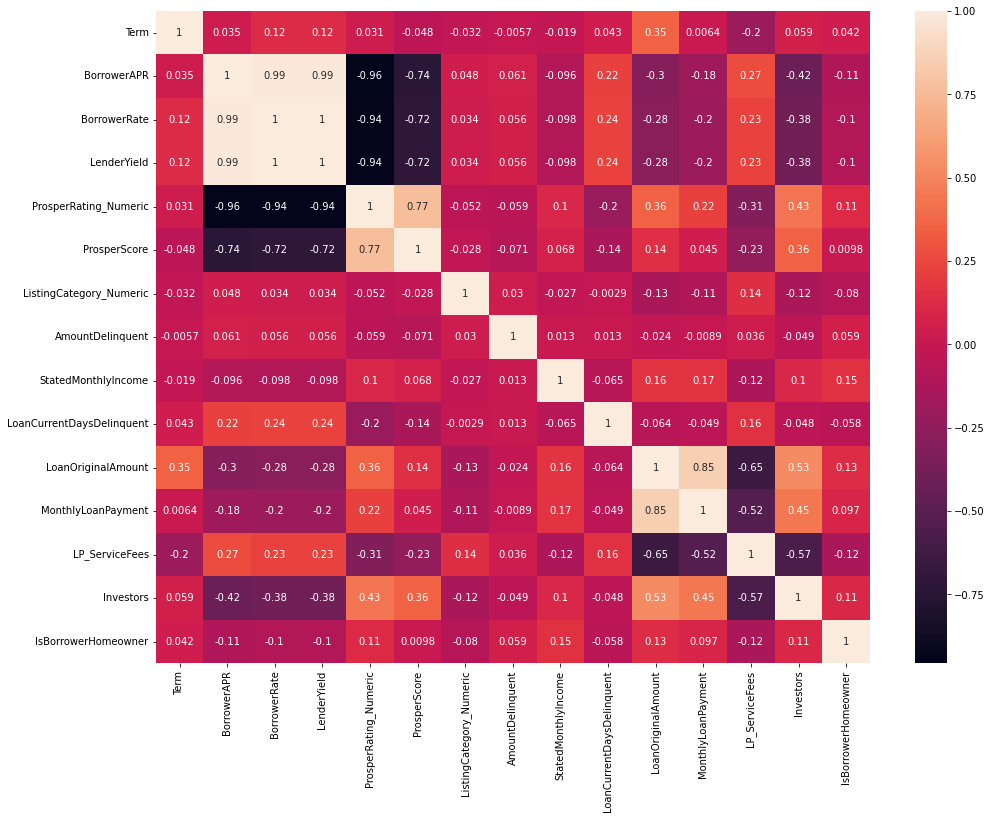

In [7]:
plt.figure(figsize=(16, 12))
sns.heatmap(loan_df.corr(), annot=True)

- The following pairs of variables are strongly positively correlated:

        [BorrowerAPR, BorrowerRate], [BorrowerAPR, LenderYield], [BorrowerRate, LenderYield], [MonthlyLoanPayment, LoanOriginalAmount], [ProsperScore, ProsperRating_Numeric]

- The following pairs of variable are strongly negatively correlated:
        
        [ProsperRating_Numeric, BorrowerRate], [ProsperRating_Numeric, BorrowerAPR], [ProsperRating_Numeric, LenderYield], [ProsperProsperScore, BorrowerRate],[ProsperProsperScore, BorrowerAPR], [ProsperScore, LenderYield]

<AxesSubplot:>

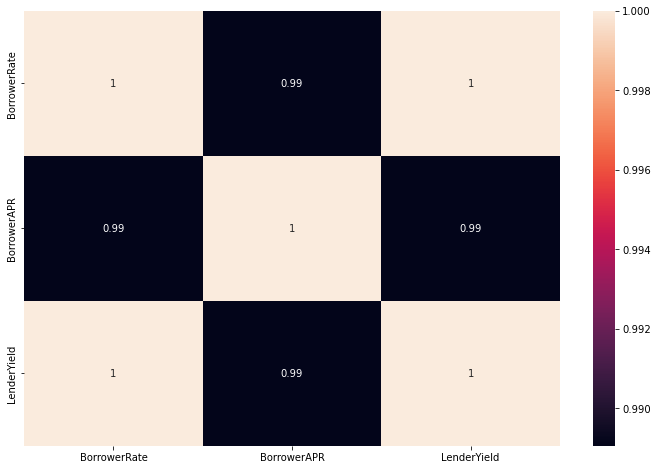

In [8]:
sns.heatmap(loan_df[['BorrowerRate', 'BorrowerAPR', 'LenderYield']].corr(), annot=True)

The following variables/features are strongly correlated:

        BorrowerRate, BorrowerAPR, and LenderYield

Hence, I will be using BorrowerAPR to represent the other two, though correlation doesn't necessary implies causation.

In [9]:
loan_df = loan_df.copy().drop(['BorrowerRate', 'LenderYield'], axis=1)

### Univariate

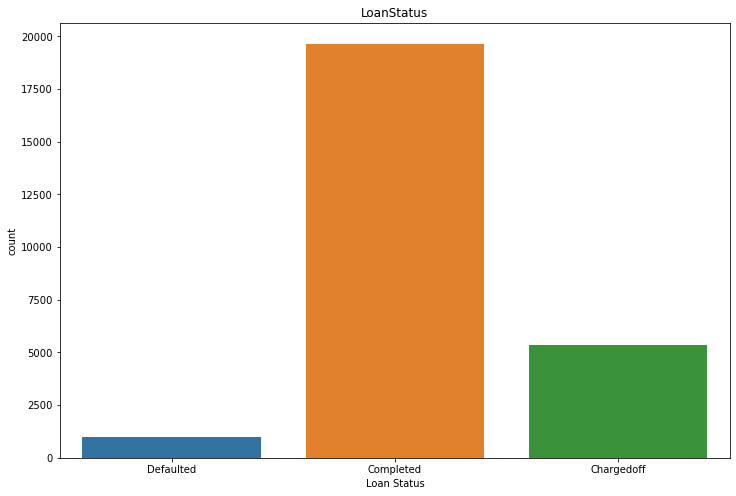

In [10]:
sns.countplot(data=loan_df,x= 'LoanStatus')
plt.title('LoanStatus')
plt.xlabel('Loan Status');

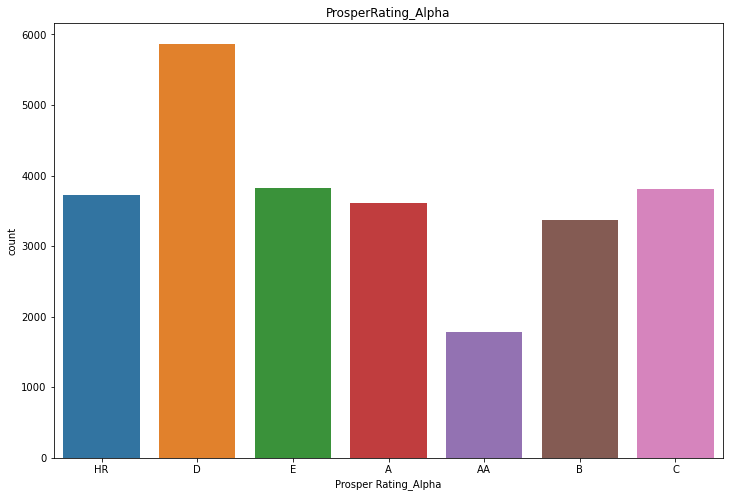

In [11]:
sns.countplot(data=loan_df,x= 'ProsperRating_Alpha')
plt.title('ProsperRating_Alpha')
plt.xlabel('Prosper Rating_Alpha');

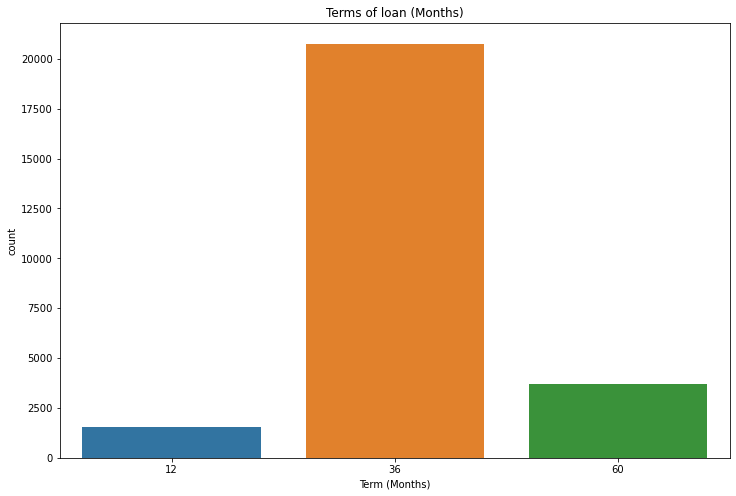

In [12]:
sns.countplot(data=loan_df,x= 'Term')
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

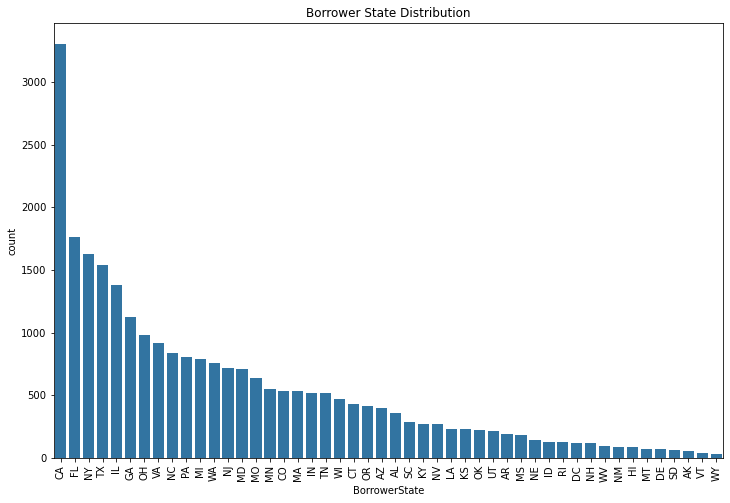

In [13]:
cat_order = loan_df['BorrowerState'].value_counts().index
sns.countplot(data=loan_df,x='BorrowerState',color=base_color, order=cat_order)
plt.title('Borrower State Distribution')
plt.xticks(rotation=90);

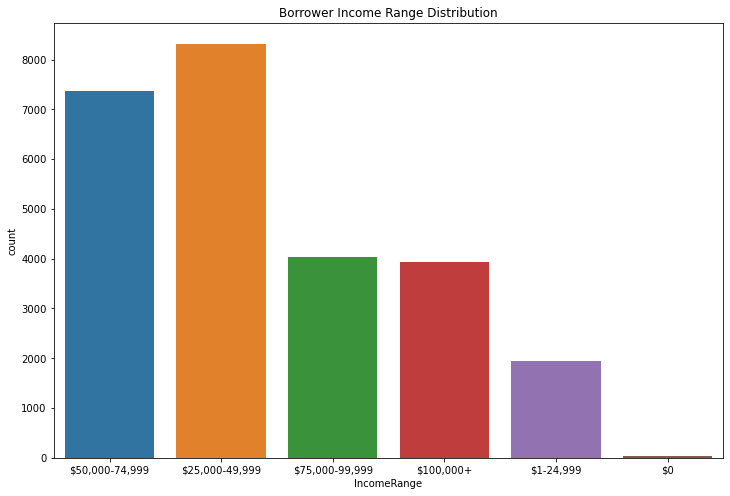

In [14]:
sns.countplot(data=loan_df,x='IncomeRange')
plt.title('Borrower Income Range Distribution');

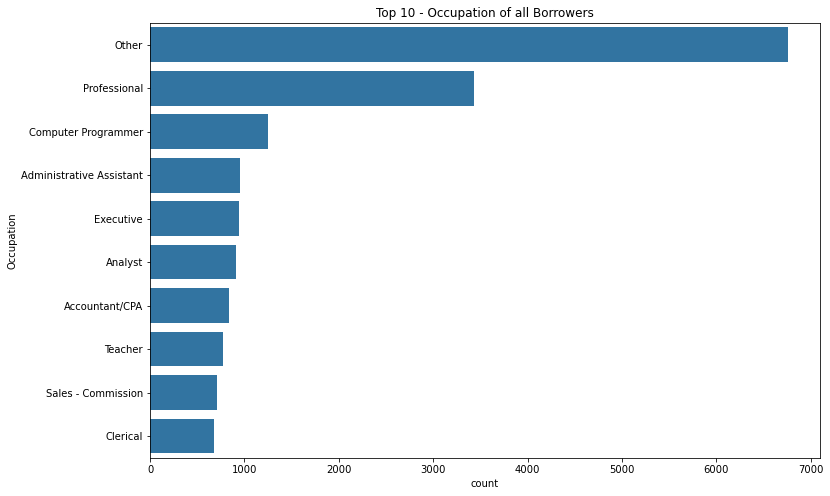

In [15]:
sns.countplot(data = loan_df, y = 'Occupation', color = base_color,
             order = loan_df['Occupation'].value_counts().head(10).index )
plt.title("Top 10 - Occupation of all Borrowers");

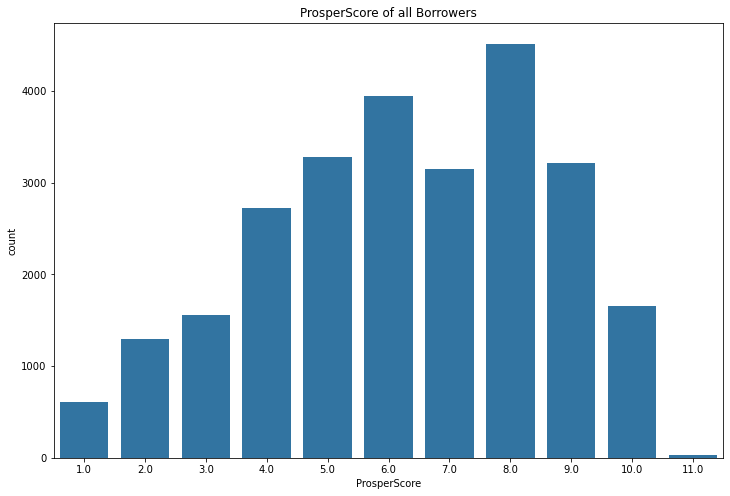

In [16]:
base_color = sns.color_palette()[0]
sns.countplot(data = loan_df, x = 'ProsperScore', color = base_color)
plt.title("ProsperScore of all Borrowers");

In [17]:
loan_df.query("LoanStatus == 'Defaulted'")['IncomeRange'].value_counts()

$25,000-49,999    420
$50,000-74,999    299
$75,000-99,999    108
$1-24,999         91 
$100,000+         71 
$0                1  
Name: IncomeRange, dtype: int64

### Bivariate

In [18]:
def annot_value(plot):
    for bar in plot.patches:
    #annotate
        plt.annotate(f"{bar.get_height():.0f}", (bar.get_x() + bar.get_width()/2, bar.get_height()), va = 'bottom', ha='center')

def plot_bivariate(df, col, hue='LoanStatus', a=0, b=0, rotation=0):
    if b == 0:
        order_type = loan_df[col].value_counts().index[a:]
    elif b != 0:
        order_type = loan_df[col].value_counts().index[a:b]
    plt.figure(figsize=[14,10])
    plot = sns.countplot(data = loan_df, x = col, hue = hue, order = order_type)
    annot_value(plot)
    plt.xlabel(col)
    plt.xticks(rotation=rotation)
    plt.title(f'Status vs {col}');

def plot_count(df, col, base_color=None, rotation=0, order=None, hue=None, palette=None, title=''):
        sns.countplot(data=df,x= col, color=base_color, order=order, hue=hue, palette=palette)
        plt.title(f'{title}')
        plt.xlabel(f'{col}')
        plt.ylabel('Count')
        plt.xticks(rotation=rotation);

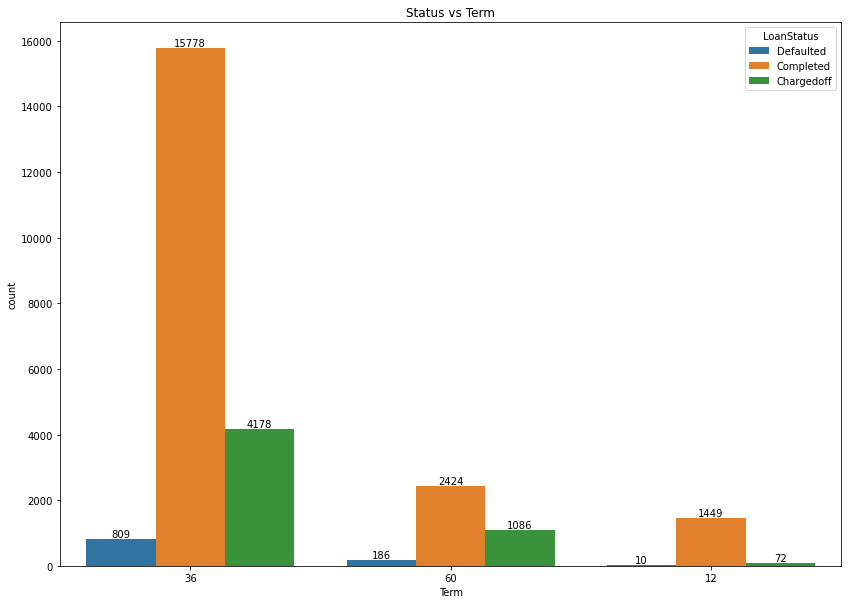

In [19]:
plot_bivariate(df=loan_df, col='Term', hue='LoanStatus')

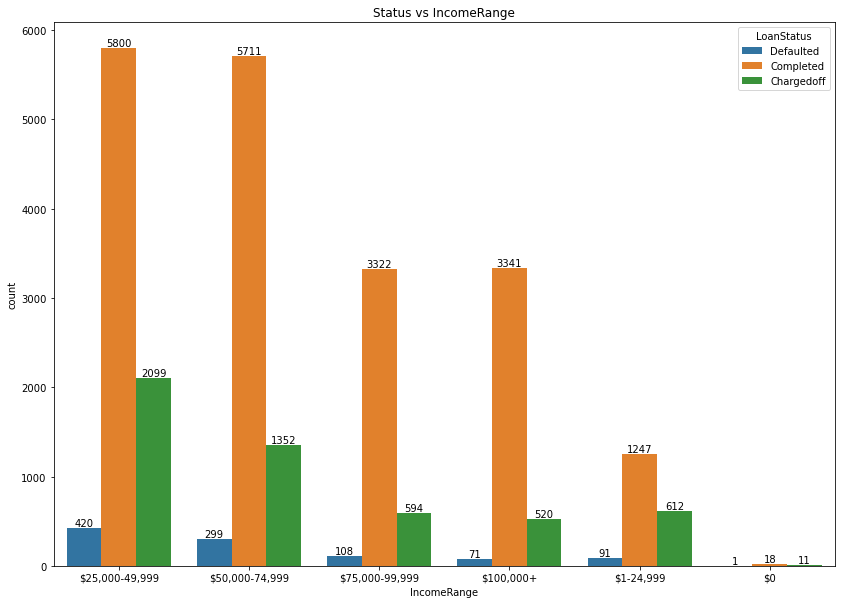

In [20]:
# Income Range
plot_bivariate(loan_df, 'IncomeRange')

In [21]:
def proportion(n1, n2, n3, label):
    print(f"Defaulted proportion is {n1/(n1+n2+n3)} for {label}")
    print(f"Completed proportion is {n2/(n1+n2+n3)} for {label}")
    print(f"Chargedoff proportion is {n3/(n1+n2+n3)} for {label}")

proportion(1, 18, 11, "$0")
print('\n')
proportion(91, 1247, 612, "$1 - $25k")
print('\n')
proportion(420, 5800, 2099, "$25k - $50k")
print('\n')
proportion(420, 5800, 2099, "$50k - $75k")
print('\n')
proportion(420, 5800, 2099, "$75k - $100k")
print('\n')
proportion(71, 3341, 520, "$100k+")

Defaulted proportion is 0.03333333333333333 for $0
Completed proportion is 0.6 for $0
Chargedoff proportion is 0.36666666666666664 for $0


Defaulted proportion is 0.04666666666666667 for $1 - $25k
Completed proportion is 0.6394871794871795 for $1 - $25k
Chargedoff proportion is 0.31384615384615383 for $1 - $25k


Defaulted proportion is 0.05048683736025965 for $25k - $50k
Completed proportion is 0.6971991825940618 for $25k - $50k
Chargedoff proportion is 0.25231398004567857 for $25k - $50k


Defaulted proportion is 0.05048683736025965 for $50k - $75k
Completed proportion is 0.6971991825940618 for $50k - $75k
Chargedoff proportion is 0.25231398004567857 for $50k - $75k


Defaulted proportion is 0.05048683736025965 for $75k - $100k
Completed proportion is 0.6971991825940618 for $75k - $100k
Chargedoff proportion is 0.25231398004567857 for $75k - $100k


Defaulted proportion is 0.018056968463886065 for $100k+
Completed proportion is 0.8496948118006104 for $100k+
Chargedoff proportion is 

- People with IncomeRange greater tahn or equal to 25,000 USD had the highest count in terms of loan consideration. With majority being around 25,000 USD - 74,999 USD

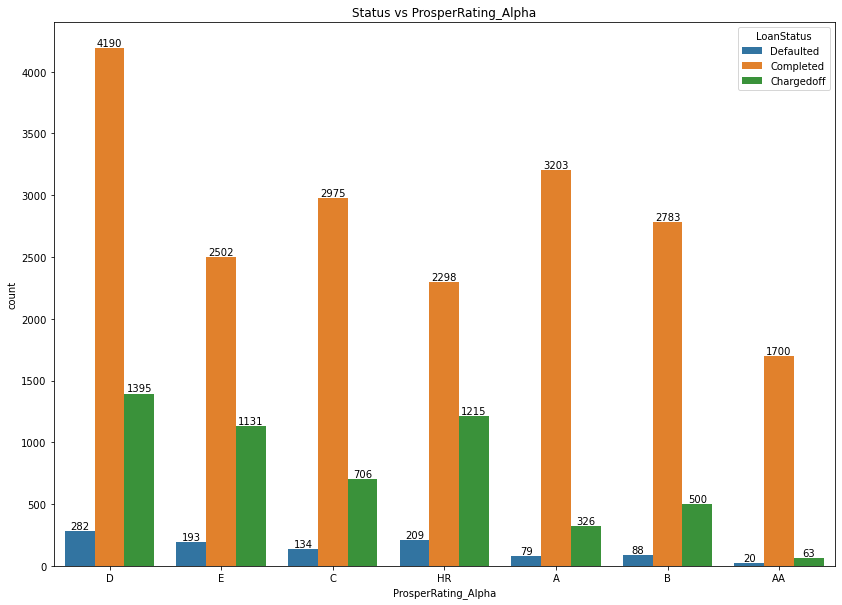

In [22]:
# Prosper Rating Alpha
plot_bivariate(df=loan_df, col='ProsperRating_Alpha')

**ListingCategory:** (Nominal Variable)

- The category of the listing that the borrower selected when posting their listing:
    
    0 - Not Available 
    
    1 - Debt Consolidation

    2 - Home Improvement

    3 - Business

    4 - Personal Loan

    5 - Student Use

    6 - Auto

    7- Other

    8 - Baby&Adoption

    9 - Boat

    10 - Cosmetic Procedure

    11 - Engagement Ring

    12 - Green Loans

    13 - Household Expenses

    14 - Large Purchases

    15 - Medical/Dental

    16 - Motorcycle

    17 - RV

    18 - Taxes

    19 - Vacation
    
    20 - Wedding Loans

In [23]:
loan_df['ListingCategory_Numeric'].value_counts()[0:10]

1     12729
7     4765 
2     2612 
3     2366 
6     1204 
13    596  
15    370  
5     274  
18    214  
19    198  
Name: ListingCategory_Numeric, dtype: int64

In [24]:
listing_category = {1:'Debt Consolidation', 7:'Other', 2:'Home Improvement', 3:'Business', 6:'Auto',
                     13:'Household Expenses', 15:'Medical/Dental', 5:'Student Use', 18:'Taxes', 19:'Vacation'}


listing = []
for val in loan_df['ListingCategory_Numeric']:
    if val in listing_category:
        listing.append(listing_category[val])
    else:
        listing.append(val)
loan_df['Loan_reason'] = listing
loan_df['Loan_reason'].value_counts()[:10]

Debt Consolidation    12729
Other                 4765 
Home Improvement      2612 
Business              2366 
Auto                  1204 
Household Expenses    596  
Medical/Dental        370  
Student Use           274  
Taxes                 214  
Vacation              198  
Name: Loan_reason, dtype: int64

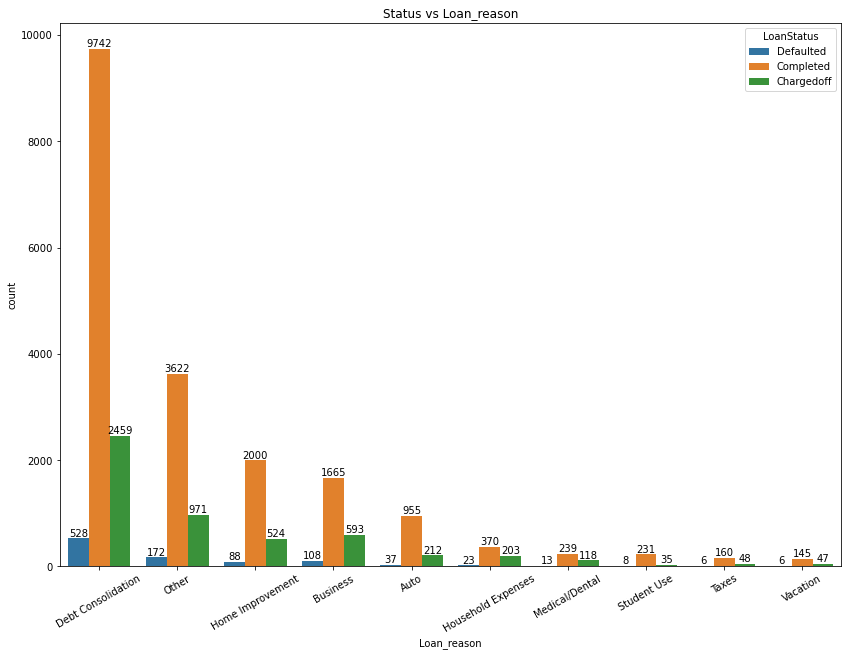

In [25]:
# Loan Reason
plot_bivariate(df=loan_df, col='Loan_reason', a=0, b=10, rotation=30)

- Most people's reason for borrowing loan is due to **Debt Consolidation**
- Majority of the defaulters had oustanding debt already.

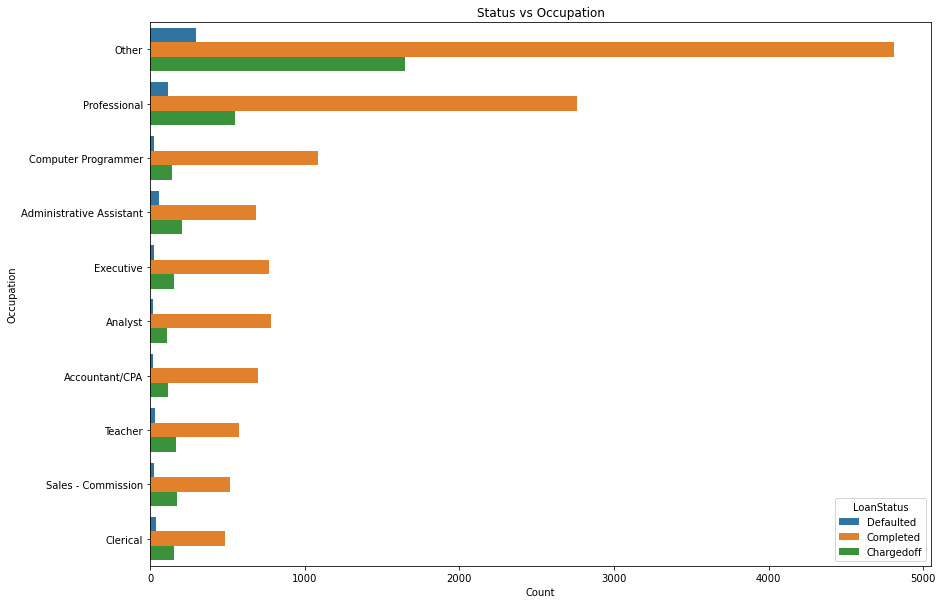

In [26]:
# Occupation
order_type = loan_df['Occupation'].value_counts().index[0:10]
plt.figure(figsize=[14,10])
plot = sns.countplot(data = loan_df, y = 'Occupation', hue = 'LoanStatus', order = order_type)
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Status vs Occupation');

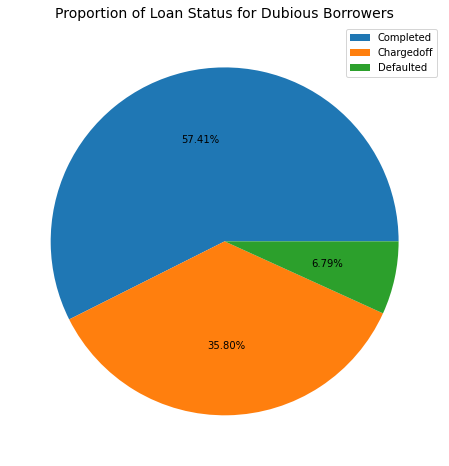

In [27]:
dubious_borrower = loan_df[loan_df['Occupation'] == 'Other'][loan_df['EmploymentStatus'] == 'Other'][loan_df['ListingCategory_Numeric'] == 7]
labels = dubious_borrower.LoanStatus.value_counts().index
plt.pie(dubious_borrower.LoanStatus.value_counts(), autopct='%.2f%%');
plt.title('Proportion of Loan Status for Dubious Borrowers', fontsize=14)
plt.legend(labels, loc = 'upper right');

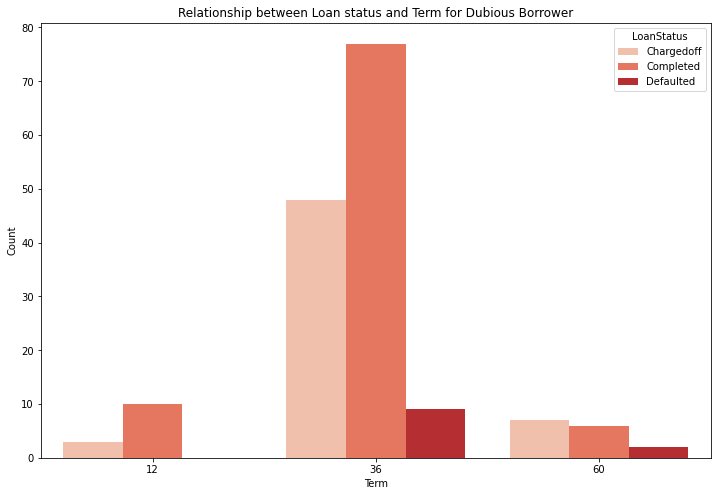

In [28]:
plot_count(df=dubious_borrower, col='Term', hue='LoanStatus', palette='Reds', title='Relationship between Loan status and Term for Dubious Borrower')

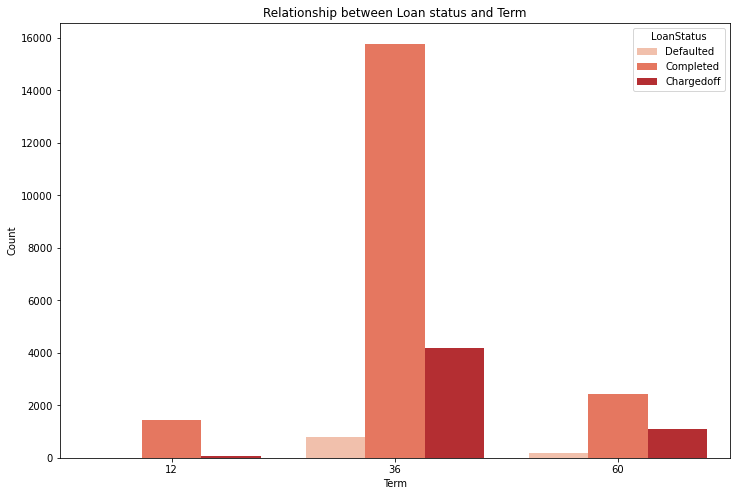

In [29]:
plot_count(df=loan_df, col='Term', hue='LoanStatus', palette='Reds', title='Relationship between Loan status and Term')

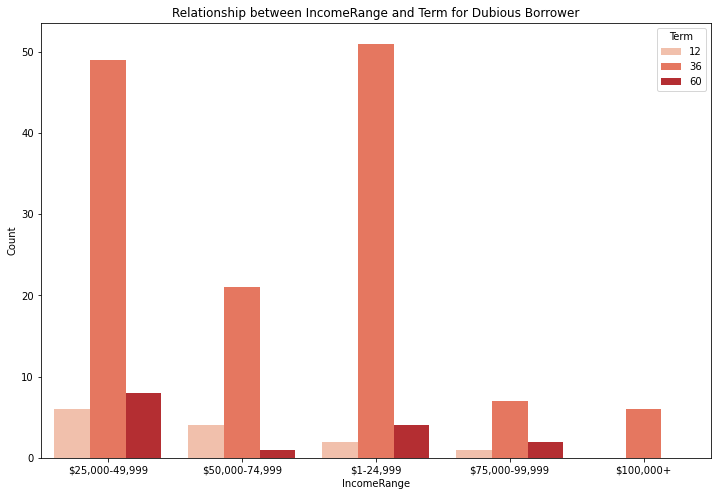

In [30]:
plot_count(df=dubious_borrower, col='IncomeRange', hue='Term', palette='Reds', title='Relationship between IncomeRange and Term for Dubious Borrower')

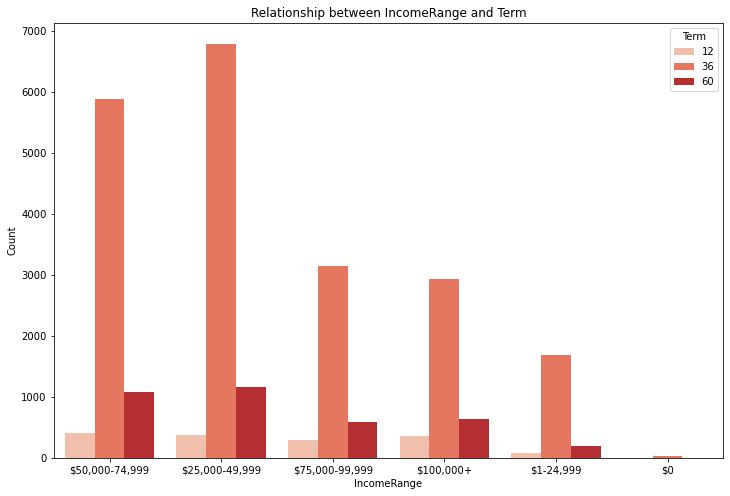

In [31]:
plot_count(df=loan_df, col='IncomeRange', hue='Term', palette='Reds', title='Relationship between IncomeRange and Term')

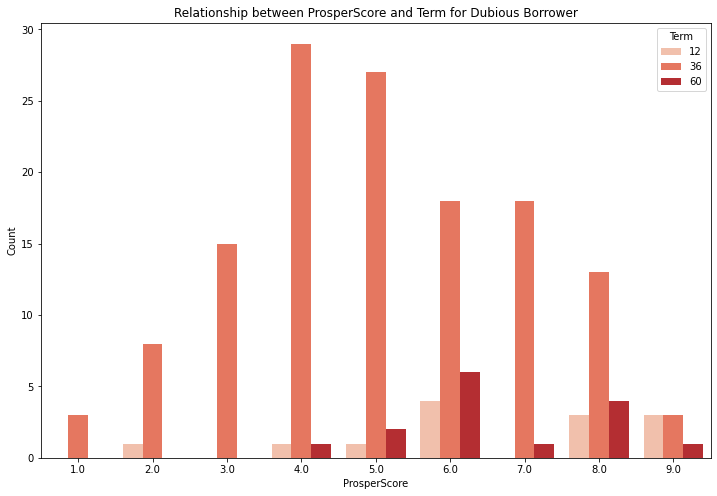

In [32]:
plot_count(df=dubious_borrower, col='ProsperScore', hue='Term', palette='Reds', title='Relationship between ProsperScore and Term for Dubious Borrower')

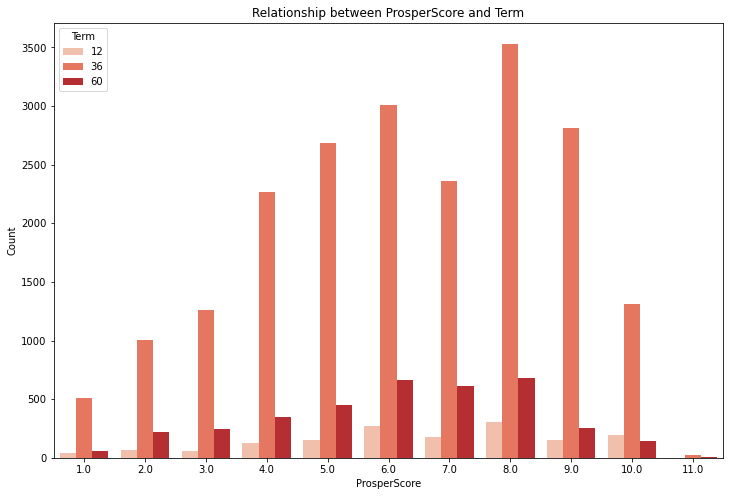

In [33]:
plot_count(df=loan_df, col='ProsperScore', hue='Term', palette='Reds', title='Relationship between ProsperScore and Term')

<AxesSubplot:>

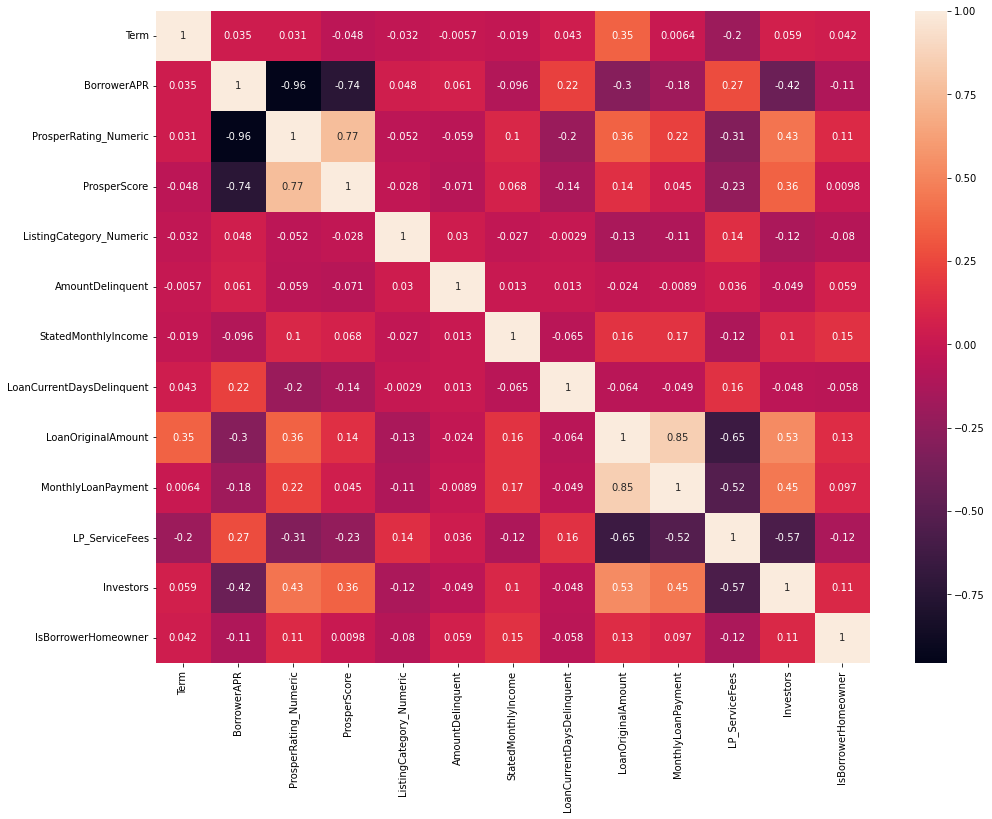

In [34]:
plt.figure(figsize=(16, 12))
sns.heatmap(loan_df.corr(), annot=True)

### Multivariate

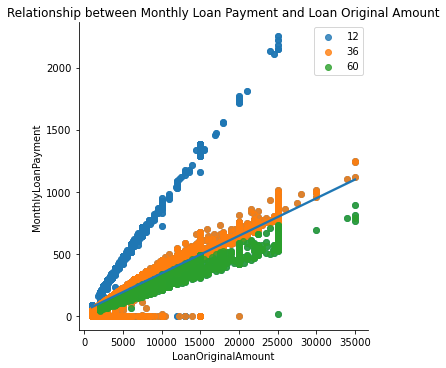

In [35]:
# Use lmplot to plot scatter points
sns.lmplot(y='MonthlyLoanPayment', x='LoanOriginalAmount', hue='Term', data=loan_df, fit_reg=False, legend=False);
# Use regplot to plot the regression line
sns.regplot(data=loan_df, y='MonthlyLoanPayment', x='LoanOriginalAmount', scatter_kws={"zorder":-1})
plt.title("Relationship between Monthly Loan Payment and Loan Original Amount");
plt.legend()

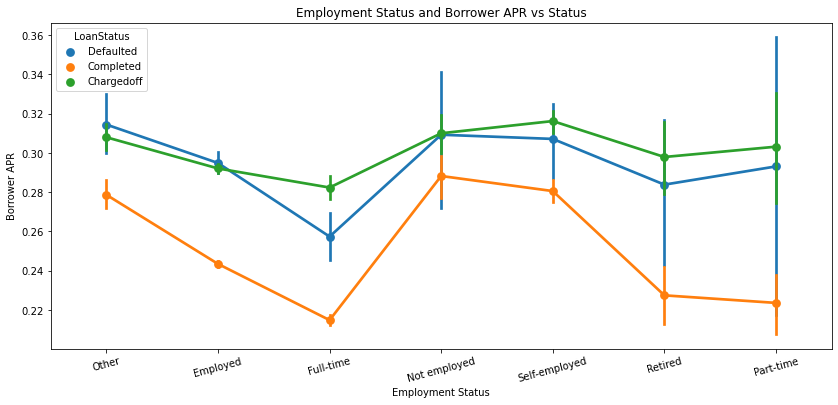

In [36]:
plt.figure(figsize=[14,6])
sns.pointplot(data = loan_df, y = 'BorrowerAPR', x = 'EmploymentStatus', hue = "LoanStatus")
plt.xlabel('Employment Status')
plt.ylabel('Borrower APR')
plt.title('Employment Status and Borrower APR vs Status')
plt.xticks(rotation = 15);

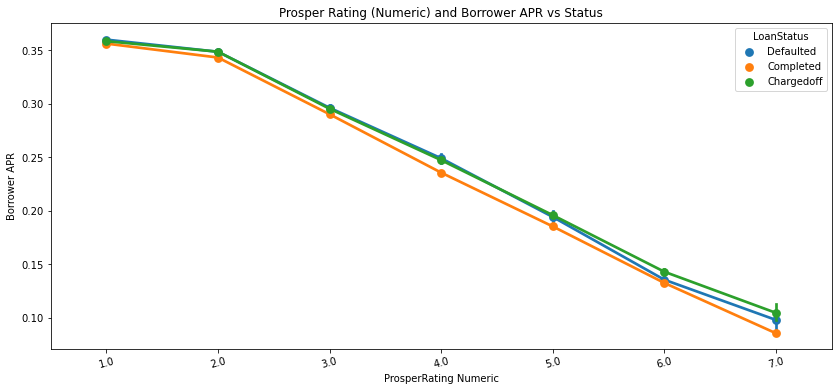

In [37]:
plt.figure(figsize=[14,6])
sns.pointplot(data = loan_df, y = 'BorrowerAPR', x = 'ProsperRating_Numeric', hue = "LoanStatus")
plt.xlabel('ProsperRating Numeric')
plt.ylabel('Borrower APR')
plt.title('Prosper Rating (Numeric) and Borrower APR vs Status')
plt.xticks(rotation = 15);

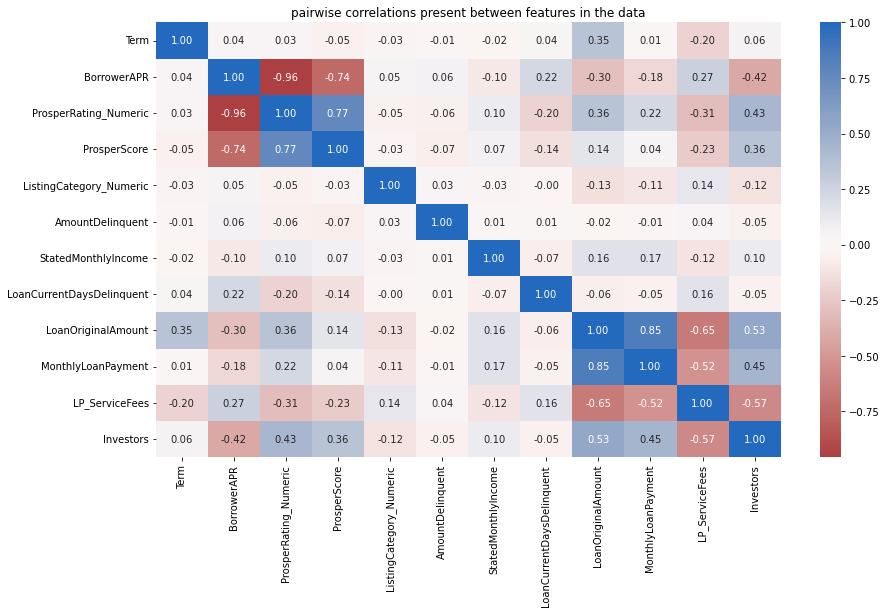

In [38]:
numeric_var = loan_df.select_dtypes(include='number').columns
categoric_var = ['Term', 'EmploymentStatus', 'ProsperRating_Alpha', 'Occupation', 'IncomeRange', 'ListingCategory_Numeric', 'BorrowerState']
plt.figure(figsize = [14, 8])
sns.heatmap(loan_df[numeric_var].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title("pairwise correlations present between features in the data");

In [39]:
loan_df.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,ProsperRating_Alpha,ProsperRating_Numeric,ProsperScore,ListingCategory_Numeric,BorrowerState,...,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors,IsBorrowerHomeowner,Loan_reason
0,2012-04-10 09:14:46.297,36,Defaulted,2012-12-19,0.35797,HR,1.0,5.0,13,FL,...,"$50,000-74,999",5500.000000,140,4000,2012-04-19,173.71,-9.81,10,True,Household Expenses
1,2013-04-22 13:29:19.073,36,Defaulted,2013-12-26,0.28032,D,3.0,5.0,15,IL,...,"$25,000-49,999",2500.000000,193,2000,2013-04-26,78.67,-4.89,30,False,Medical/Dental
2,2013-02-12 18:07:31.690,60,Completed,2013-10-22,0.30748,E,2.0,3.0,1,NY,...,"$25,000-49,999",3885.916667,0,4000,2013-02-21,124.76,-25.81,37,False,Debt Consolidation
3,2010-06-16 16:23:44.533,36,Completed,2013-07-03,0.11296,A,6.0,9.0,1,CO,...,"$75,000-99,999",6666.666667,0,4000,2010-06-24,0.00,-64.62,121,True,Debt Consolidation
4,2012-01-30 17:59:17.200,36,Completed,2012-12-19,0.12782,A,6.0,9.0,20,CA,...,"$25,000-49,999",3750.000000,0,10000,2012-02-07,322.62,-68.22,30,False,20
